In [3]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [4]:
df=pd.read_csv("house_prices.csv")

In [5]:
df.drop("Condition1", axis=1,inplace=True)
df.drop("Condition2", axis=1,inplace=True)
df.drop("BldgType", axis=1,inplace=True)
df.drop("LotArea", axis=1,inplace=True)
df.drop("LandSlope", axis=1,inplace=True)
df.drop("OverallCond", axis=1,inplace=True)
df.drop("OverallQual", axis=1,inplace=True)
df.drop("SaleCondition", axis=1,inplace=True)
df.drop("YrSold", axis=1,inplace=True)
df.drop("MoSold", axis=1,inplace=True)
df.drop("MSZoning", axis=1,inplace=True)
df.drop("LandContour", axis=1,inplace=True)
df.drop("PoolQC", axis=1,inplace=True)
df.drop("Fence", axis=1,inplace=True)
df.drop("MiscFeature", axis=1,inplace=True)
df.drop("SaleType", axis=1,inplace=True)

In [6]:
df.head(1)

,Id,MSSubClass,LotFrontage,Street,Alley,LotShape,Utilities,LotConfig,Neighborhood,HouseStyle,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,60,65.0,Pave,NaN,Reg,AllPub,Inside,CollgCr,2Story,...,TA,Y,0,61,0,0,0,0,0,208500


In [7]:
df.isnull().sum()

Id                0
MSSubClass        0
LotFrontage     259
Street            0
Alley          1369
               ... 
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
SalePrice         0
Length: 65, dtype: int64

In [8]:
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    le=LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
x=df.drop("SalePrice", axis=1)
y=df["SalePrice"]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [11]:
dtrain=xgb.DMatrix(x_train, label=y_train)
dtest=xgb.DMatrix(x_test, label=y_test)

params={
    "objective" : "reg:squarederror",
    "max_depth" : 6,
    "eta" : 0.8,
    "colsample_bytree" : 0.8,
    "eval_metric" : "rmse"
}

model = xgb.train(params, dtrain, num_boost_round=100,evals=[(dtest,"test")], early_stopping_rounds=10)

[0]	test-rmse:42465.39880
[1]	test-rmse:34774.29328
[2]	test-rmse:34318.13285
[3]	test-rmse:34510.37779
[4]	test-rmse:35175.25148
[5]	test-rmse:34520.30475
[6]	test-rmse:34568.58240
[7]	test-rmse:34009.48318
[8]	test-rmse:34351.82832
[9]	test-rmse:34344.33881
[10]	test-rmse:34352.63741
[11]	test-rmse:34554.75519
[12]	test-rmse:34418.78810
[13]	test-rmse:34428.56137
[14]	test-rmse:34421.67309
[15]	test-rmse:34485.98029
[16]	test-rmse:34501.38600
[17]	test-rmse:34584.49678


In [12]:
y_pred = model.predict(dtest)

In [13]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")

RMSE: 34584.496778147986
MAE: 23037.26658818493
R2 Score: 0.8285939693450928


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


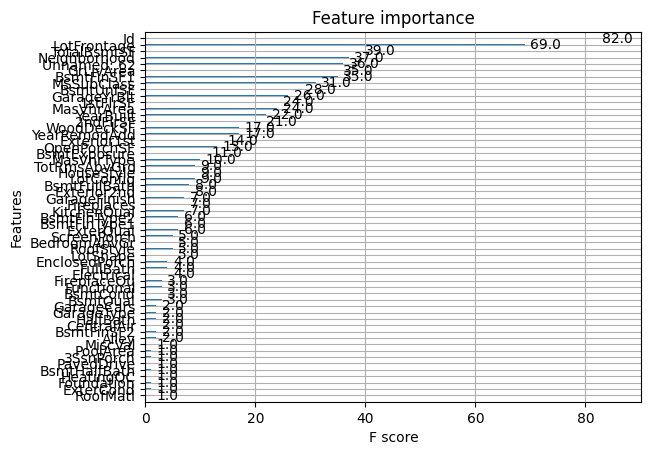

In [14]:
# Plot feature importance
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [15]:
model.save_model("xgboost.csv")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [22:33:42] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
